<a href="https://colab.research.google.com/github/Valarmathi434/TIME-SERIES-FORECASTING-WITH-FACEBOOK-PROPHET-IN-PYTHON/blob/main/TIME_SERIES_FORECASTING_WITH_FACEBOOK_PROPHET_IN_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install prophet

In [ ]:
import pandas as pd
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

In [ ]:
url = ("/content/electricity-demand.csv")
data = pd.read_csv(url)
data.head()

,Entity,Code,Year,Electricity demand - TWh
0,ASEAN (Ember),NaN,2000,368.08
1,ASEAN (Ember),NaN,2001,396.60
2,ASEAN (Ember),NaN,2002,423.11
3,ASEAN (Ember),NaN,2003,447.70
4,ASEAN (Ember),NaN,2004,485.55


In [ ]:
df = pd.DataFrame()
df['ds'] = pd.to_datetime(data['Year'])
df['y'] = data['Electricity demand - TWh']
df.head()


,ds,y
0,1970-01-01 00:00:00.000002000,368.08
1,1970-01-01 00:00:00.000002001,396.60
2,1970-01-01 00:00:00.000002002,423.11
3,1970-01-01 00:00:00.000002003,447.70
4,1970-01-01 00:00:00.000002004,485.55


In [ ]:
m = Prophet()
m.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp84jlp092/z9gf2ezn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp84jlp092/x4okbz_w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15631', 'data', 'file=/tmp/tmp84jlp092/z9gf2ezn.json', 'init=/tmp/tmp84jlp092/x4okbz_w.json', 'output', 'file=/tmp/tmp84jlp092/prophet_modelgqcnzytf/prophet_model-20240424062624.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:26:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:26:24 - cmdstanpy - INFO - Chain

In [ ]:
future = m.make_future_dataframe(periods=12 * 12,
								freq='M')

In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower',
		'yhat_upper', 'trend',
		'trend_lower', 'trend_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
172,1981-08-31 00:00:00.000002022,7.693074e+18,5.059862e+18,1.053273e+19,7.693074e+18,5.059862e+18,1.053273e+19
173,1981-09-30 00:00:00.000002022,7.747251e+18,5.079937e+18,1.061580e+19,7.747251e+18,5.079937e+18,1.061580e+19
174,1981-10-31 00:00:00.000002022,7.803233e+18,5.103432e+18,1.071025e+19,7.803233e+18,5.103432e+18,1.071025e+19
175,1981-11-30 00:00:00.000002022,7.857410e+18,5.125686e+18,1.080198e+19,7.857410e+18,5.125686e+18,1.080198e+19
176,1981-12-31 00:00:00.000002022,7.913392e+18,5.148911e+18,1.087825e+19,7.913392e+18,5.148911e+18,1.087825e+19


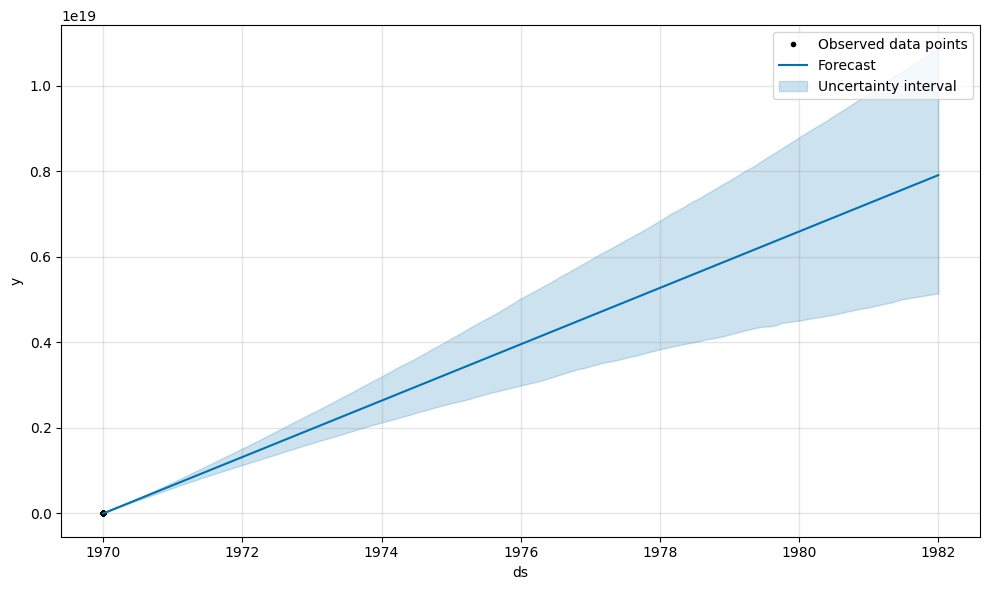

In [ ]:
fig1 = m.plot(forecast, include_legend=True)

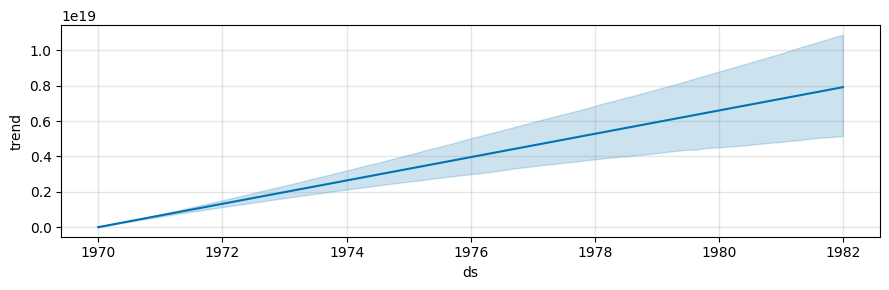

In [ ]:
fig2 = m.plot_components(forecast)

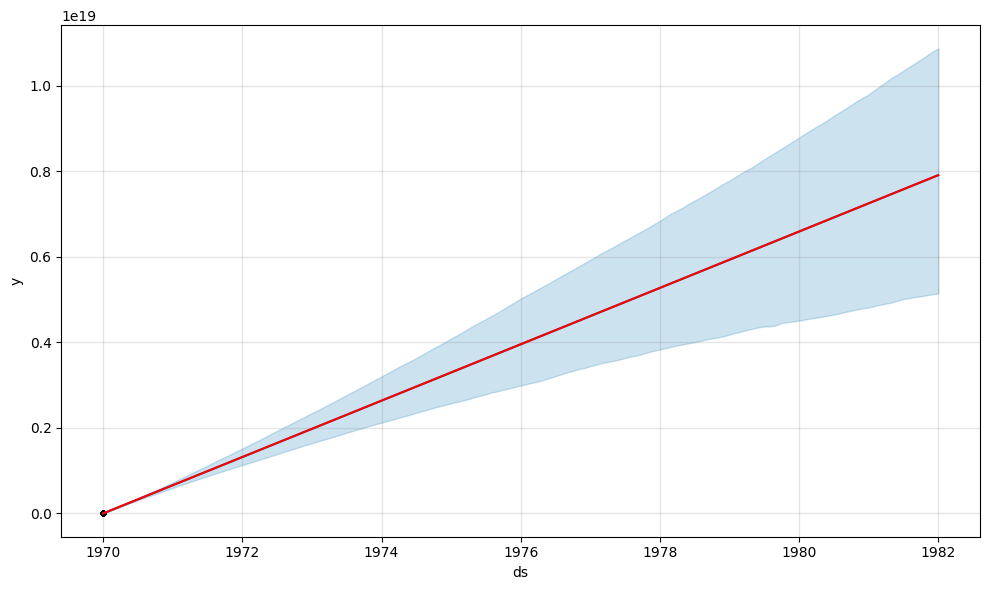

In [ ]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(),
							m, forecast)


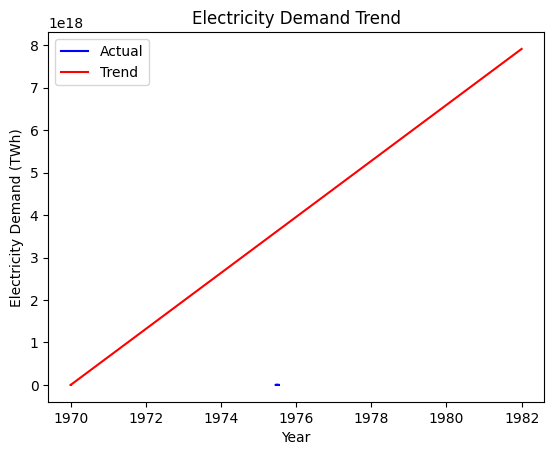

In [ ]:
import matplotlib.pyplot as plt
plt.plot(data['Year'], data['Electricity demand - TWh'], label='Actual', color='blue')
plt.plot(forecast['ds'], forecast['trend'], label='Trend', color='red')
plt.xlabel('Year')
plt.ylabel('Electricity Demand (TWh)')
plt.legend()
plt.title('Electricity Demand Trend')
plt.show()


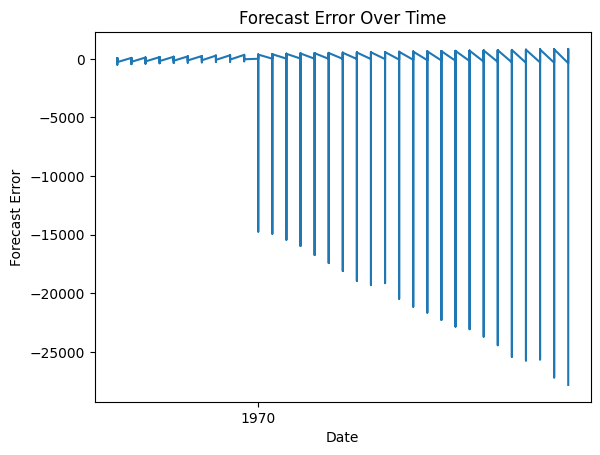

In [ ]:
forecast_error = forecast.set_index('ds')['yhat'] - df.set_index('ds')['y']
plt.plot(forecast_error)
plt.xlabel('Date')
plt.ylabel('Forecast Error')
plt.title('Forecast Error Over Time')
plt.show()


In [ ]:
# Print the future target values along with dates
print(forecast[['ds', 'yhat']].tail())

                               ds          yhat
172 1981-08-31 00:00:00.000002022  7.693074e+18
173 1981-09-30 00:00:00.000002022  7.747251e+18
174 1981-10-31 00:00:00.000002022  7.803233e+18
175 1981-11-30 00:00:00.000002022  7.857410e+18
176 1981-12-31 00:00:00.000002022  7.913392e+18
